# Telescope Simulation

Simulation of parabolic lens focusing light of a plane wave

## Kitt Peak 2.1m Telescope
From http://www.noao.edu/outreach/kptour/2_1_m.html, this telescope has the following specs:

- Diameter = 2.4m = 2400mm
- Focal Ratio = f/2.63
- Focal Length = 2400*2.63 = 6312mm

In [23]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [98]:
# Lens Parameters
diameter = 2400
focal_length = 6312

# Equation for reflector's shape
def parabola(x):
    return (x**2)/(4*focal_length)

# Incident ray parameters
num_rays = 5
angle_incident = np.deg2rad(5) # In radians

# Reflection Locations
# Calculating Y-values where reflection occurs
reflection_y = np.zeros(num_rays)
for i in np.arange(num_rays):
    # Evenly space rays over the diameter of reflector
    reflection_y[i] = -diameter/2 + i*diameter/(num_rays-1)
# Calculating mirror displacement at reflection location
reflection_x = -parabola(reflection_y)

# Start Locations
# Setting X value where incident rays come from
start_x = -8000
# Calculating Y values where incident rays come from
start_y = reflection_y+(start_x-reflection_x)*np.tan(angle_incident)

# Calculating reflected angles of each ray
angle_reflected = angle_incident - (1/focal_length)*reflection_y

# End locations
# Calculating X values where reflected waves end
end_x = -8000
# Calculating Y values where incident rays come from
end_y = reflection_y+(reflection_x-end_x)*np.tan(angle_reflected)

print(np.rad2deg(angle_reflected))

[ 15.89273375  10.44636687   5.          -0.44636687  -5.89273375]


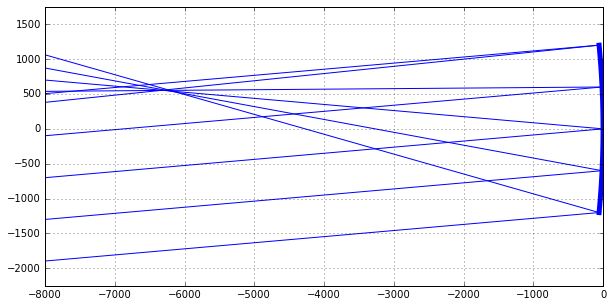

In [101]:
plt.figure(figsize=(10,5))

# Plot parabolic lens
y = np.arange(-1200,1200,1)
x = -parabola(y)
plt.plot(x,y,linewidth=5.0)

# Plot incident light rays
for i in np.arange(num_rays):
    line = plt.Line2D((start_x,reflection_x[i]), (start_y[i],reflection_y[i]), lw=1)
    plt.gca().add_line(line)
    
# Plot reflected light rays
for i in np.arange(num_rays):
    line = plt.Line2D((end_x,reflection_x[i]), (end_y[i],reflection_y[i]), lw=1)
    plt.gca().add_line(line)

plt.axis("equal")
plt.grid("on")

In [57]:
reflection_x[i]

57.034220532319395